# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

## Уровень 0:

- Задание 1:


Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.


In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

**1. Нормальное распределение**

Зависит от 2х параметров μ (в документации scipy соответствует параметру loc) и σ (соответствует параметру scale).  
μ отвечает за сдвиг функции по оси х, на μ приходится пик "колокола" на графике  
σ отвечает за масштаб "колокола": чем меньше σ, тем форма графика острее, чем больше - тем форма шире и более пологая

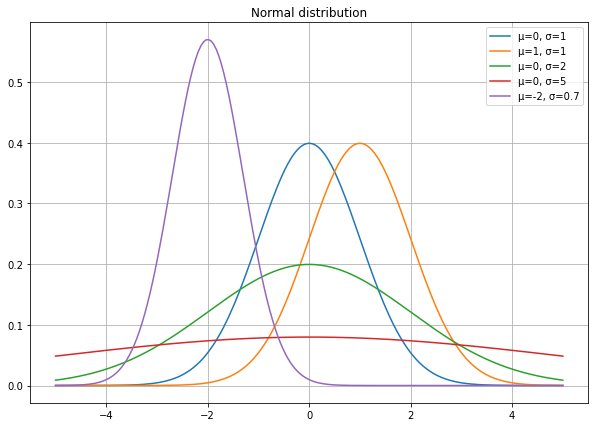

In [23]:
params = [(0, 1), (1, 1), (0, 2), (0, 5), (-2, 0.7)] # возьмем произвольные пары значений 

x = np.linspace(-5, 5, 200) # пусть значения х определены на отрезке от -5 до 5

plt.figure(figsize=(10, 7))
plt.grid()

for param in params:
    
    plt.plot(x, stats.norm.pdf(x, loc=param[0], scale=param[1]), label=f'μ={param[0]}, σ={param[1]}')
    plt.title('Normal distribution')
    
plt.legend()
plt.show()

**2. Экспоненциальное распределение**

Зависит от параметра λ. Чем больше значение параметра λ, тем меньше значение функции начальной точке и тем плавнее функция убывает. В scipy.expon соответствует параметру scale. Стоит заметить, что как и в других функциях семейства scipy мы можем использовать параметр loc, который будет сдвигать график функции по оси х, но параметр сдвига здесь я рассматривать не буду, т.к. по определению свойства экспоненциального распределения контролируются единственным параметром λ



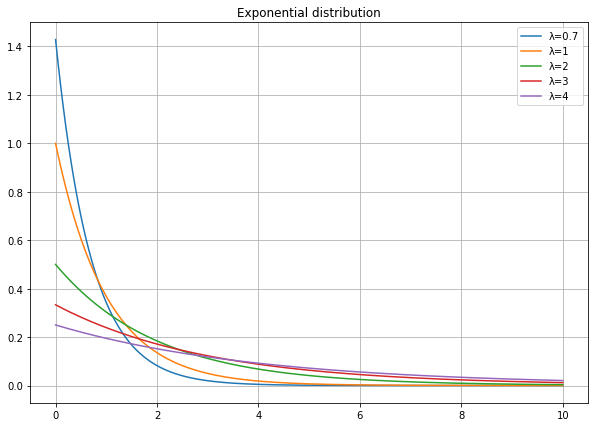

In [29]:
params = [0.7, 1, 2, 3, 4]

x = np.linspace(0, 10, 200) 

plt.figure(figsize=(10, 7))
plt.grid()

for param in params:
    
    plt.plot(x, stats.expon.pdf(x,scale=param), label=f'λ={param}')
    plt.title('Exponential distribution')
    
plt.legend()
plt.show()

**3. Распределение Стьюдента**

Определяется количеством степеней свободы n. Так же в scipy может быть изменена параметрами сдвига loc и масштаба scale. Чем больше значение n, тем сильнее график распределения Стьюдента приближается к графику нормального распределения того же масштаба (на графике - красная пунктирная линия)  

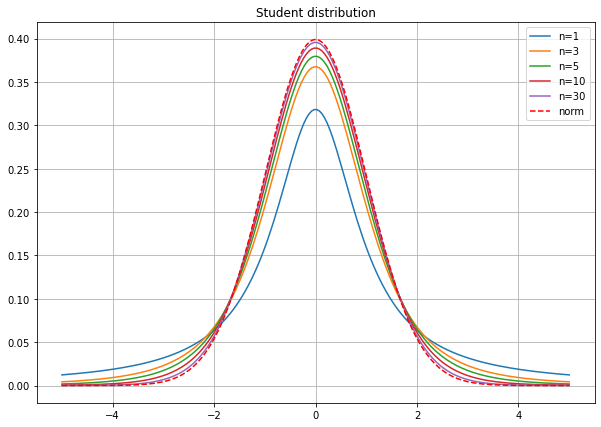

In [35]:
params = [1, 3, 5, 10, 30]

x = np.linspace(-5, 5, 200) 

plt.figure(figsize=(10, 7))
plt.grid()

for param in params:
    
    plt.plot(x, stats.t.pdf(x, df=param), label=f'n={param}')
    plt.title('Student distribution')

plt.plot(x, stats.norm.pdf(x), color='r', label='norm', linestyle='--')
plt.legend()
plt.show()

## Уровень 1:

- Задание 2

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания  в отрезок $[3.5;7]$, т.е. P(3.5 &lt; $\xi$ &lt; 7).

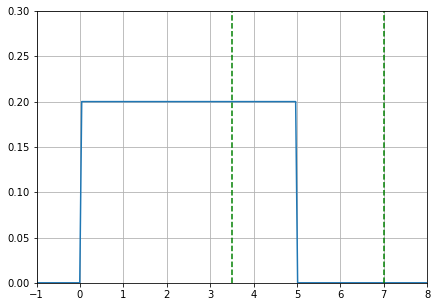

In [40]:
a, b = (0, 5) # границы отрезка
C = 1/(b-a) # по определению
mean = (a + b)/2 # Мат. ожидание

x = np.linspace(-1,8,200)

plt.figure(figsize=(7, 5))
plt.grid()
plt.plot(x, stats.uniform(0, 5).pdf(x))
plt.axvline(x=3.5, color='g', linestyle='--')
plt.axvline(x=7, color='g', linestyle='--')
plt.xlim(-1, 8)
plt.ylim(0, 0.3)
plt.show()

Вероятность попадания в отрезок [3.5, 7] будет соответствовать площади под графиком плотности распределения, ограниченным концами этого отрезка (на графике - зеленый пунктир).

In [43]:
print(f'C = {C}')
print(f'Мат. ожидание = {mean}')
print(f'Вероятность попадания в отрезок  P(3.5 <  𝜉  < 7) = {round((b - 3.5)*C, 3)}')

C = 0.2
Мат. ожидание = 2.5
Вероятность попадания в отрезок  P(3.5 <  𝜉  < 7) = 0.3


- Задание 3


Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

В 1м случае мы должны определить количество информации, которое несет каждое из событий, вероятности которых неодинаковы. Для этого нам необходимо знать собственно вероятности каждого события и применить формулу Шеннона  
$I(i) = -(p(i)*log2(p(i))$

In [44]:
p_red = 54/(54+4+28)
p_yellow = 4/(54+4+28)
p_green = 28/(54+4+28)

i_red = -(p_red*np.log2(p_red)) 
i_yellow = -(p_yellow*np.log2(p_yellow)) 
i_green = -(p_green*np.log2(p_green))

print(f'Вероятность того, что светофор горит красным = {round(p_red, 4)}')
print(f'Сообщение о том, что светофор красный, несет {round(i_red, 4)} бит')

print(f'Вероятность того, что светофор горит желтым = {round(p_yellow, 4)}')
print(f'Сообщение о том, что светофор желтый, несет {round(i_yellow, 4)} бит')

print(f'Вероятность того, что светофор горит зеленым = {round(p_green, 4)}')
print(f'Сообщение о том, что светофор зеленый, несет {round(i_green, 4)} бит')

Вероятность того, что светофор горит красным = 0.6279
Сообщение о том, что светофор красный, несет 0.4216 бит
Вероятность того, что светофор горит желтым = 0.0465
Сообщение о том, что светофор желтый, несет 0.2059 бит
Вероятность того, что светофор горит зеленым = 0.3256
Сообщение о том, что светофор зеленый, несет 0.5271 бит


Во 2м случае события равновероятны (количество событий N = 3, вероятность каждого p = 1/3), так что можно воспользоваться более простой формулой Хартли $I = log2(N)$. В этом случае сообщение о том, что светофор горит именно красным несет столько же информации, сколько и сообщения о том, что светофор горит желтым либо зеленым. Это количество информации будет равным I/N

In [48]:
print(f'Вероятность того, что светофор горит конкретным цветом = {round(1/3, 4)}')
print(f'Сообщение о том, что светофор горит конкретным цветом, несет {round(np.log2(3)/3, 4)} бит')

Вероятность того, что светофор горит конкретным цветом = 0.3333
Сообщение о том, что светофор горит конкретным цветом, несет 0.5283 бит
